### Contributing Factors to Smoking Behavior: The American Perspective
Dayin Wijaya (dw1971)<br>
Hanh Thi Van Nguyen (htn260)<br>
Wei-chih “Wilson” Hsu (wch300)<br>

### Cigarette Use by State

In [ ]:
import plotly
plotly.tools.set_credentials_file(username='tenggelammm', api_key='QkMplScrJNu2f3Etvkxk')
import plotly.plotly as py
import pandas as pd

In [ ]:
df = pd.read_excel('C:/Users/Acer/Downloads/CigUse.xlsx')

In [33]:
for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(254,229,217)'],[0.2, 'rgb(252,187,161)'],[0.4, 'rgb(252,146,114)'],\
            [0.6, 'rgb(251,106,74)'],[0.8, 'rgb(222,45,38)'],[1.0, 'rgb(165,15,21)']]

df['text'] = df['state']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['code'],
        z = df['cig'].astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(37,37,37)',
                width = 1
            ) ),
        colorbar = dict(
            title = "Percentage (%)")
        ) ]

layout = dict(
        title = '2016 US Adults Cigarette Use by State<br>',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout)
py.iplot( fig, filename='d3-cloropleth-map' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~tenggelammm/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


To see the interactive map above, go to the following link https://plot.ly/~tenggelammm/0

### Cigarette Use Against Mean Household Income

In [ ]:
inc = pd.read_csv('C:/Users/Acer/Downloads/income.csv')
merged = pd.merge(df,inc,on='state')

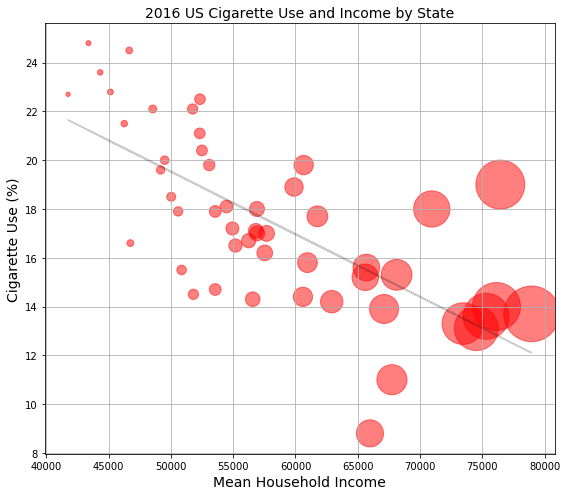

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
x=merged['mean household']
y=merged['cig']
b, m = polyfit(x, y, 1)

mean = np.mean(merged['mean household'])
area = (2*merged['mean household']/mean)**8

fig, ax = plt.subplots(figsize=(8,7))
ax.scatter(merged['mean household'],merged['cig'],c='red', s=area, alpha=0.5)
ax.plot(x, b+ m*x,'r',c='black', alpha=0.2)

ax.set_xlabel('Mean Household Income', fontsize=14)
ax.set_ylabel('Cigarette Use (%)', fontsize=14)
ax.set_title('2016 US Cigarette Use and Income by State', fontsize=14)

ax.grid(True)
fig.tight_layout()

plt.show()

### Race and Gender

Text(0.5,1,'Cigarette Use among Adults 18 or Older, by Race and Sex - United States 2016')

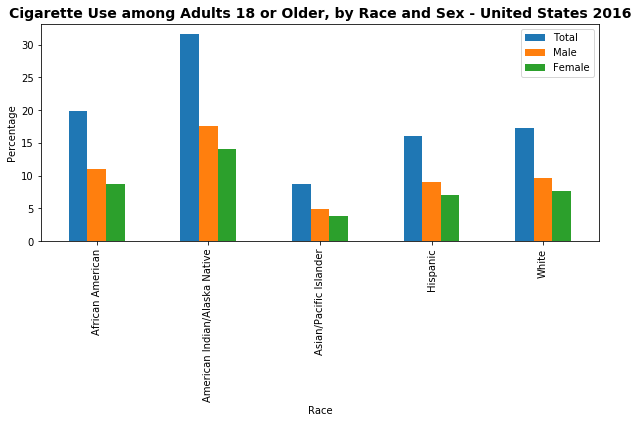

In [9]:
data = '/Users/hanhnguyen/DownloadS/Dataset1.xls'
df_race = pd.read_excel(data,sheet_name='Race',na_values=['n/a', '--'])
df_race1 = df_race.groupby( 'Race').mean()
df_race1.columns=('Total','Male','Female')
fig, ax = plt.subplots()
df_race1.plot(ax =ax, y=["Total", "Male", "Female"], kind="bar", figsize = (10,4))
ax.set_ylabel('Percentage')
ax.set_title('Cigarette Use among Adults 18 or Older, by Race and Sex - United States 2016', fontsize=14, fontweight='bold',loc='center')

### Age

Text(0.5,1,'Cigarette Use among Adults by Age - United States 2016')

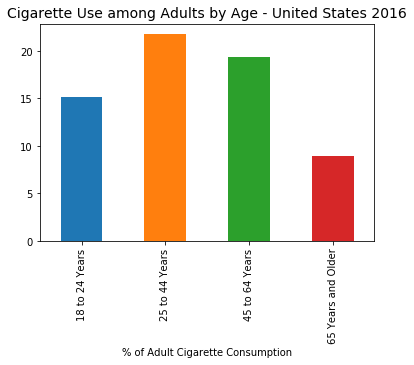

In [23]:
df_age = pd.read_excel(data,sheet_name='Age')
df_age1 = df_age.groupby( 'Age').mean()
fig, ax = plt.subplots()
fig, ax = plt.subplots()
df_age1['Data Value'].plot(ax=ax,kind= 'bar', align='center',width=0.5)
ax.set_xlabel('% of Adult Cigarette Consumption')
ax.set_title('Cigarette Use among Adults by Age - United States 2016', fontsize=14,loc='center')

### Education

Text(0.5,1,'Cigarette Use among Adults 18 or Older by Education -  United States 2016')

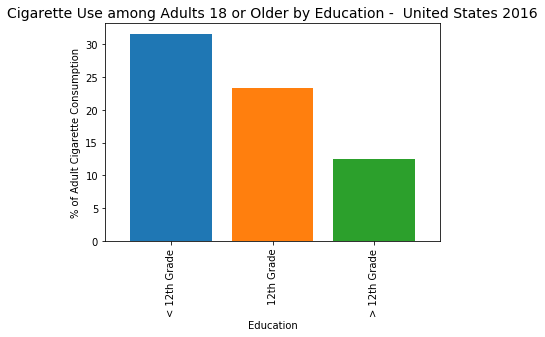

In [22]:
df_edu = pd.read_excel(data2,sheet_name='Education')
df_edu1 = df_edu.groupby( 'Education').mean()
df_edu1= df_edu1.sort_values(by='Data Value',ascending=False).head(10)
fig, ax = plt.subplots()
df_edu1['Data Value'].plot(ax=ax,kind= 'bar',width=0.8)
ax.set_ylabel('% of Adult Cigarette Consumption')
ax.set_title('Cigarette Use among Adults 18 or Older by Education -  United States 2016', fontsize=14,loc='center', )

In [148]:
import os
import statsmodels.api as sm

### Usage

In [147]:
#Loading file
path = "/Users/WilsonHsu/Desktop/Usage.xls"
usage = pd.read_excel(path, encoding="utf-8")

#Targeting 2016 data, modifying data type, and renaming data column
usage = usage.drop(usage[usage.Gender != "Overall"].index)
usage['Data Value'].astype("float64")
usage = usage.rename(index=str, columns={"Data Value": "Usage"})
usage_current = usage.drop(usage[usage.Response != "Current"].index)
usage_former = usage.drop(usage[usage.Response != "Former"].index)
usage_never = usage.drop(usage[usage.Response != "Never"].index)
usage_current = usage_current.drop(usage_current[usage_current.Year != "2016"].index)

#Reseting index to State
usage_current = usage_current.set_index("Location Description")

#Creating aggregate dataframe
Aggregate = usage_current[['Year', 'Usage']].copy()



### Funding

In [129]:
#Loading file for funding
path = "/Users/WilsonHsu/Desktop/Funding.xls"
funding = pd.read_excel(path, encoding="utf-8")

#Targeting 2016 data, modifying data type, and renaming data column
funding = funding.drop(funding[funding.Source != "Total Per Capita"].index)
funding = funding.drop(funding[funding.Year != "2016"].index)
funding['Data Value'] = funding['Data Value'].replace(",","",regex=True).astype("float64")
funding = funding.rename(index=str, columns={"Data Value": "Funding"})

#Reseting index to State
funding = funding.set_index("Location Description")

#Determining correlation
corr = usage_current['Usage'].corr(funding['Funding'])

################

Aggregate['Funding'] = funding['Funding']

### Policy Tax Burden

In [130]:
#Loading file
path = "/Users/WilsonHsu/Desktop/Policy Tax Burden.xls"
politax = pd.read_excel(path, encoding="utf-8")

#Targeting 2016 data, modifying data type, and renaming data column
politax = politax.drop(politax[politax.Year != "2016"].index)
politax = politax.drop(politax[politax["Sub-Measure"] != "Federal and State Tax per pack "].index)
politax["Data Value"] = politax["Data Value"].astype("float64")
politax = politax.rename(index=str, columns={"Data Value": "Cost per pack"})

#Reseting index to State
politax = politax.set_index("Location Description")

#Determining correlation
corr = politax["Cost per pack"].corr(usage_current['Usage'])

Aggregate['Tax'] = politax["Cost per pack"]

### Support Call Hours of Operation

In [131]:
# Loading file
path = "/Users/WilsonHsu/Desktop/HoursOperation.xls"
hours = pd.read_excel(path, encoding="utf-8")

#Targeting 2016 and Hours of Operation data, and modifying data type
hours = hours.drop(hours[hours["Sub-Measure"] != "Hours of Operation"].index)
hours = hours.drop(hours[hours.Year != "2016"].index)


#Converting dataframe to list of lists, and perserving column names
labels = list(hours.columns)
hourslist = hours.values.tolist()

#Converting text based hours of operations to numerical based values
for ind in range(len(hourslist)):
    AM = hourslist[ind][9].count("AM")
    if hourslist[ind][9] == "24 hours":
        hourslist[ind][9] = 24
    elif hourslist[ind][9] == "Closed":
        hourslist[ind][9] = 0
    elif AM == 2:
        string = hourslist[ind][9].replace("AM", "").replace(" ", "")
        dashloc = string.find("-")
        startendtime = [string[:dashloc],string[dashloc+1:len(string)-3]]
        for substr in startendtime:
            startendtime[startendtime.index(substr)] = float(substr[:len(substr)-3])*60 + float(substr[substr.find(":")+1:])
        if startendtime[1] > startendtime[0]:
            hourslist[ind][9] = (startendtime[1] - startendtime[0])/60
        else:
            hourslist[ind][9] = (24*60 + (startendtime[1] - startendtime[0]))/60
    elif hourslist[ind][9].count("PM") == 1:
        string = hourslist[ind][9].replace("AM", "").replace("PM", "").replace(" ", "")
        dashloc = string.find("-")
        startendtime = [string[:dashloc],string[dashloc+1:len(string)-3]]
        startendtime[0] = 12*60 - float(startendtime[0][:len(startendtime[0])-3])*60 + float(startendtime[0][startendtime[0].find(":")+1:])
        startendtime[1] = float(startendtime[1][:len(startendtime[1])-3])*60 + float(startendtime[1][startendtime[1].find(":")+1:])
        hourslist[ind][9] = (startendtime[1] + startendtime[0])/60
    else:
        print(hourslist[ind])

iterations = int(len(hourslist)/7)
for ind in range(iterations):
    a = []
    for ind2 in range(7):
        a.append(hourslist[ind+ind2][9])
    hourslist[ind][9] = sum(a)
    hourslist[ind][7] = "Week"
    del hourslist[ind+6]
    del hourslist[ind+5]
    del hourslist[ind+4]
    del hourslist[ind+3]
    del hourslist[ind+2]
    del hourslist[ind+1]

iterations = int(len(hourslist)/4)
for ind in range(iterations + 20):
    if ind == len(hourslist):
        break
    a = []
    b = 0
    for ind2 in range(4):
        if ind + ind2 > len(hourslist):
            break
        if hourslist[ind + ind2][0] == hourslist[ind][0] and hourslist[ind + ind2][2] == hourslist[ind][2]:
            a.append(hourslist[ind+ind2][9])
            b = b+1
        else:
            break
    hourslist[ind][9] = sum(a)/len(a)
    for each in range(b-1):
        del hourslist[ind+1]
        
for each in range(len(hourslist)):
    if each != 0:
        last = hourslist[each][1]
    if each != 0 and hourslist[each][1] != "4":
        print(hourslist[each])

#Converting list back to dataframe
hours = pd.DataFrame.from_records(hourslist, columns=labels)

#Reseting index to states, and renaming data column
hours = hours.set_index("Location Description")
hours = hours.rename(index=str, columns={"Live Pick-Up of Calls": "Hours of Operations"})

hours["Hours of Operations"].corr(usage_current["Usage"])


Aggregate["Hours of Operations"] = hours["Hours of Operations"]


### Support Call Volume

In [132]:
#Loading file
path = "/Users/WilsonHsu/Desktop/SupportCallVolume.xls"
supportcall = pd.read_excel(path, encoding="utf-8")

#Targeting 2016 data, modifying data type, and renaming data column
supportcall = supportcall.drop(supportcall[supportcall.Variable != "Total Incoming Calls"].index)
supportcall = supportcall.drop(supportcall[supportcall.Year != "2016"].index)
supportcall["Value"].astype("float64")
supportcall = supportcall.rename(index=str, columns={"Value": "Call Volume"})


#Summing call volumes over 4 quarters
supportcallq1 = supportcall.drop(supportcall[supportcall.Quarter != "1"].index).set_index("Location Description")
supportcallq2 = supportcall.drop(supportcall[supportcall.Quarter != "2"].index).set_index("Location Description")
supportcallq3 = supportcall.drop(supportcall[supportcall.Quarter != "3"].index).set_index("Location Description")
supportcallq4 = supportcall.drop(supportcall[supportcall.Quarter != "4"].index).set_index("Location Description")
supportcall = supportcall.drop(supportcall[supportcall.Quarter != "1"].index).set_index("Location Description")
supportcall["Call Volume"] = supportcallq1["Call Volume"] + supportcallq2["Call Volume"] + supportcallq3["Call Volume"] + supportcallq4["Call Volume"]

corr1 = supportcall["Call Volume"].corr(usage_current['Usage'])
corr2 = hours["Hours of Operations"].corr(supportcall["Call Volume"])

Aggregate["Call Volume"] = supportcall["Call Volume"]


### Calculating Correlations

                            OLS Regression Results                            
Dep. Variable:                  Usage   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.9151
Date:                Wed, 19 Dec 2018   Prob (F-statistic):              0.343
Time:                        21:40:06   Log-Likelihood:                -135.50
No. Observations:                  51   AIC:                             275.0
Df Residuals:                      49   BIC:                             278.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.0001      0.699     24.321      0.0

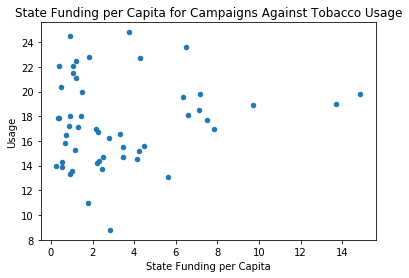

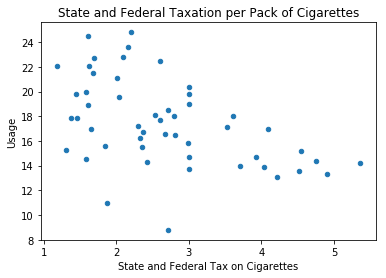

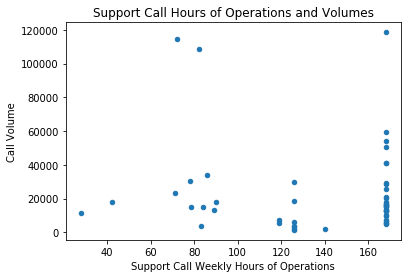

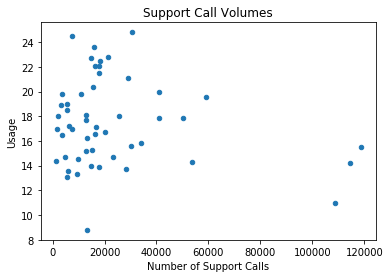

In [145]:
Aggregate = Aggregate.dropna(axis=0)
ax = Aggregate.plot.scatter(y="Usage", x="Funding", title='State Funding per Capita for Campaigns Against Tobacco Usage')
ax.set_xlabel("State Funding per Capita")
ax = Aggregate.plot.scatter(y="Usage", x="Tax", title='State and Federal Taxation per Pack of Cigarettes')
ax.set_xlabel("State and Federal Tax on Cigarettes")
ax = Aggregate.plot.scatter(y="Call Volume", x="Hours of Operations", title='Support Call Hours of Operations and Volumes')
ax.set_xlabel("Support Call Weekly Hours of Operations")
ax = Aggregate.plot.scatter(y="Usage", x="Call Volume", title='Support Call Volumes')
ax.set_xlabel("Number of Support Calls")
            
x = Aggregate[["Funding"]]
x = sm.add_constant(x)
y = Aggregate[["Usage"]]
model = sm.OLS(endog=y, exog=x).fit()
print(model.summary())

x = Aggregate[["Tax"]]
x = sm.add_constant(x)
y = Aggregate[["Usage"]]
model = sm.OLS(endog=y, exog=x).fit()
print(model.summary())

x = Aggregate[["Hours of Operations"]]
x = sm.add_constant(x)
y = Aggregate[["Call Volume"]]
model = sm.OLS(endog=y, exog=x).fit()
print(model.summary())

x = Aggregate[["Call Volume"]]
x = sm.add_constant(x)
y = Aggregate[["Usage"]]
model = sm.OLS(endog=y, exog=x).fit()
print(model.summary())

